In [1]:
# STEP 1.1

from urllib.request import urlopen
txt = urlopen("https://raw.githubusercontent.com/crash-course-ai/lab2-nlp/master/vlogbrothers.txt").read().decode('ascii').split("\n")
print("Our dataset contains {} vlogbrothers scripts".format(len(txt)))
# ADVANCED_CHANGEME -- You can change this to load any text file 
# You want it to be one line of plain text for every script.  Extra
# annotations like [John:] or *starts coughing* make learning more difficult.
everything = set([w for s in txt for w in s.split()])
print("and {} lexical types".format(len(everything)))

Our dataset contains 626 vlogbrothers scripts
and 31924 lexical types


In [0]:
# STEP 1.2

# 1. Import the tokenizer
import spacy
nlp = spacy.load("en", disable=["parser","tagger","ner","textcat"])

# 2. Tokenize
txt = [nlp(s) for s in txt]

# 3. Mark the beginning and end of each script 
txt = [ ["<s>"] + [str(w) for w in s] + ["</s>"] for s in txt]

# 4. Separate the data into training and validation
train = txt[:-5]
valid = txt[-5:]

# 5. Flatten the lists into one long string and remove extra whitespace
train = [w for s in train for w in s if not w.isspace()]
valid = [w for s in valid for w in s if not w.isspace()]

In [3]:
# STEP 1.3

"""
  How big is our dataset?
"""
print("Our training dataset contains {} lexical types".format(len(set(train))))
print("Our training dataset contains {} lexical tokens".format(len(train)))

Our training dataset contains 22945 lexical types
Our training dataset contains 569560 lexical tokens


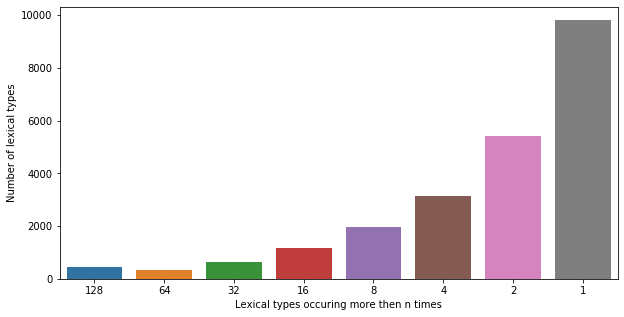

In [4]:
# STEP 1.4

# 1. Count the frequencies of every word
from collections import Counter, defaultdict
counts = Counter(train)

frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
import matplotlib.pyplot as plt
import seaborn as sns

f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times', 
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(labels, frequencies, ax=a, order=labels)

In [5]:
# STEP 1.5

from textwrap import wrap
rare = [w for w in counts if counts[w] == 1]
for line in wrap(" ".join(["{:15s}".format(w) for w in rare [:100]]), width=70):
  print(line)

Pisgah          recycle         Inconvenient    sorta
ignored         Sheets          Toilet          Situation
oghomamamam     Oomph           Drinking        grizzly         malt
minty           alcoholy        tast-           achoo
Babysitter      Brave           Eden            Biblical
exalted         Eggers          Gourevitch      Thur-
patriarchal     Caravans        BP              58
Sixteen         condense        12:15           Misprinted      floss
terse           Punishment      Continuum       Apocalypticism  Emmitt
styrofoam       locations       Dances          Boxing
Federation      Upper           Poops           Poop
Kirsten         Dunst           Umbros          UEFA            Gunter
nonfictionaly   nonfictional    Roker           Ilyich          Linden
bullshit        Monty           Python          Idle
Lilliputians    Naked           gaping          theorem
origami         ambiguously     exhaustible     grace           Mortal
Kombat          tuba            

In [0]:
# STEP 1.6

# This is a little function to help us clean up the data
# CHANGEME -- Introduce or removing rules
import re
def simplify(w):
  # Remove extra punctuation
  w = w.replace("-", "").replace("-","")

  # Replace numbers with # sign
  w = re.sub('\d', '#', w)

  # Change some endings
  if len(w) > 3 and w[-2:] in set (["ed", "er", "ly"]):
    return [w[:-2], w[-2:]]
  elif len(w) > 4 and w[-3:] in set (["ing", "'re"]):
    return [w[:-3], w[-3]]
  return [w]

In [7]:
# STEP 1.7

# 1. Go through and clean all of our data
train_clean = []
for w in train:
  for piece in simplify(w):
    train_clean.append(piece)
valid_clean = []
for w in valid:
  for piece in simplify(w):
    valid_clean.append(piece)

"""
  How big is our dataset?
"""
print("{} lexical types".format(len(set(train_clean))))
print("{} lexical tokens".format(len(train_clean)))
"""
  What's our distribution look like?
"""
counts = Counter(train_clean)

19993 lexical types
612532 lexical tokens


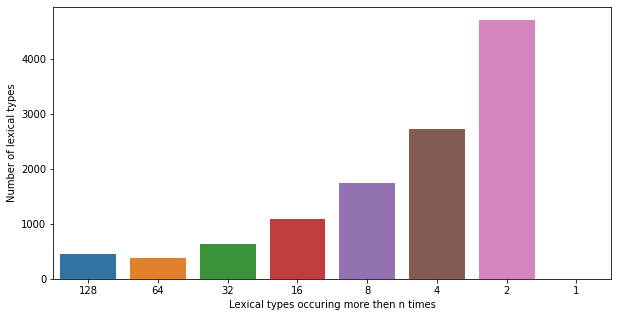

In [8]:
# STEP 1.8

counts_clean = Counter(train_clean)
train_unk = [w if counts_clean[w] > 1 else "unk" for w in train_clean]
valid_unk = [w if w in counts_clean and counts_clean[w] > 1 \
             else "unk" for w in valid_clean]

# Let's plot these one last time
counts = Counter(train_unk)

frequencies = [0]*8
for w in counts:
  if counts[w] >= 128:
    frequencies[0] += 1
  elif counts[w] >= 64:
    frequencies[1] += 1
  elif counts[w] >= 32:
    frequencies[2] += 1
  elif counts[w] >= 16:
    frequencies[3] += 1
  elif counts[w] >= 8:
    frequencies[4] += 1
  elif counts[w] >= 4:
    frequencies[5] += 1
  elif counts[w] >= 2:
    frequencies[6] += 1
  else:
    frequencies[7] += 1


# 2. Plot their distributions
import matplotlib.pyplot as plt
import seaborn as sns

f,a = plt.subplots(1,1,figsize=(10,5))
a.set(xlabel='Lexical types occuring more then n times', 
      ylabel='Number of lexical types')

labels = [128, 64, 32, 16, 8, 4, 2, 1]
_ = sns.barplot(labels, frequencies, ax=a, order=labels)

In [9]:
# STEP 1.9

rare = [w for w in counts_clean if counts_clean[w] == 1]
rare.sort()
for line in wrap("  ".join(["{:15s}".format(w) for w in rare[-100:]]), width=70):
  print(line)

whimp            whimper          whines           whippersnappers
whiskeys         whistle          whittl           wholesale
whoo             whoosey          whopp            wi
widest           widows           wields           wifi
wigg             wil              wildebeests      wilderness
wildflowers      willallpreordersofthefaultinourstarsbesign
willallpreordersofturtlesallthewaydownbesign  willful
willingness      willpow          wimp             wina
windowless       winds            winkel           winter
wipe             wipes            wires            wis
witch            withdrew         witnesses        witty
woahWOAHWOAH     wobb             wobby            womb
woodblock        woodcuts         woodpeck         wooooo
wordless         workedOn         workings         worldliness
wormhole         worms            worsens          worthwhile
wounds           wowzy            wrap             wrest
wriggl           wrist            wrought          wwwaaaahhhh
w

In [0]:
# STEP 2.1

"""
  Prepare our dataset by converting words to numbers
"""
# Create a mapping from words <-> numbers
vocabulary = set(train_unk)
word_to_num = {}
num_to_word = {}
for num, word in enumerate(vocabulary):
  word_to_num[word] = num
  num_to_word[num] =  word

# Convert our datasets into numbers
import torch
train = torch.LongTensor(len(train_unk))
for i in range(len(train_unk)):
  train[i] = word_to_num[train_unk[i]]

valid = torch.LongTensor(len(valid_unk))
for i in range(len(valid_unk)):
  train[i] = word_to_num[valid_unk[i]]

In [0]:
# STEP 2.2

# Parameters
batch_size = 20   
seq_len = 35        # CHANGEME

# Tell Torch to use a GPU for computation
device = torch.device("cuda")
# Setting the random seed decreases variability
# Remove next three lines if running on your laptop
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# citation: https://github.com/pytorch/examples/tree/master/word_language_model
def batchify(data, bsz):
    # Work out how cleanly we can divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

def get_batch(source, i, seq_len):
    seq_len = min(seq_len, len(source) - 1 - i)
    data = source[i:i+seq_len]
    target = source[i+1:i+1+seq_len].view(-1)
    return data, target

def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""
    if isinstance(h, torch.Tensor):
        return h.detach()
    else:
        return tuple(repackage_hidden(v) for v in h)

train = batchify(train, batch_size)
valid = batchify(valid, batch_size)